In [30]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.subplots as sp
import scipy

# TASK 5

In [31]:
# Define constants

R_GAS_CONSTANT = 8.31 # J/(mol*K)
AMBIENT_TEMPERATURE = 293.15 # 20C
STANDARD_PRESSURE = 101325 # 1 atm
FARADAY_CONSTANT = 96485 # C/mol
Z_ELECTRONS = 2 # electrons
HYDROGEN_HHV = 286020 # J/mol
MOLAR_VOLUME_M3 = 0.24042  # m3/mol
MOLAR_VOLUME_ML = MOLAR_VOLUME_M3 * 1e6 # ml/mol
THERMONEUTRAL_POTENTIAL = 1.482 # V

# Define uncertainty
VOLUME_MEASUREMENT_UNCERTAINTY = 1/2 # ml

CURRENT_MEASUREMENT_UNCERTAINTY = 0.1/2 # mA

VOLTAGE_MEASUREMENT_UNCERTAINTY = 0.1/2 # mV

# Measured leakage 
H2_LEAKAGE_PERMIN = 0.2 #ml/min


In [32]:
# Load H2 production data
# Load data tsv
df_prod_400ma = pd.read_table('./data/t5/h2_production_400ma.tsv')
# Load data csv
df_prod_200ma = pd.read_csv('./data/t5/h2_production_200ma.csv')
#df_prod_200ma.columns # ['v_hydrogen_measured', 'v_hydrogen_corrected', 'i_electrolyser', 'time', 'voltage_electrolyser', 'v_oxygen_measured', 'v_hydrogen_theoretical', 'efficiency_faraday', 'efficiency_electrical']]
#df_prod_400ma.columns # ['v_hydrogen_measured', 'v_hydrogen_corrected', 'i_electrolyser', 'time', 'voltage_electrolyser', 'v_oxygen_measured', 'v_hydrogen_theoretical', 'efficiency_faraday', 'efficiency_electrical']]

In [33]:
# Plot H2 production data using plotly
# Plot 400mA and 200mA against time

# Calculate the slope of the line of best fit for 400mA
# Get x and y values
x = df_prod_400ma['time']
y = df_prod_400ma['v_hydrogen_corrected']
# Calculate slope
slope400, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
# Print 
print('Slope 400mA: ', slope400)

# Calculate the slope of the line of best fit for 200mA
# Get x and y values
x = df_prod_200ma['time']
y = df_prod_200ma['v_hydrogen_corrected']
# Calculate slope
slope200, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
# Print
print('Slope 200mA: ', slope200)

print("Slope 400mA:200mA ratio:", slope400/slope200)

fig = go.Figure()
# Size 800x800, background color white, no grid, black border, Title font size 30, axis font size 20, legend font size 18
fig.update_layout(width=800, height=800, 
                #   plot_bgcolor='white', 
                #   paper_bgcolor='white', 
                  title_font_size=30, 
                  font_size=20, 
                  legend_font_size=18)

# Add 400mA data
fig.add_trace(go.Scatter(x=df_prod_400ma['time'], y=df_prod_400ma['v_hydrogen_corrected'], mode='lines+markers',
                        line=dict(width=2),
                        marker=dict(size=12, line=dict(width=2, color='black')), 
                        name='400mA'))
# Add 200mA data
fig.add_trace(go.Scatter(x=df_prod_200ma['time'], y=df_prod_200ma['v_hydrogen_corrected'], mode='lines+markers', 
                        line=dict(width=2),
                        marker=dict(size=12, symbol='cross', line=dict(width=2, color='black')),
                        name='200mA'))

# Add axis labels
fig.update_xaxes(title_text='Time [s]')
fig.update_yaxes(title_text='Volume of H2 [ml]')
# Remove gridlines
fig.update_xaxes(showgrid=True, zeroline=False)
fig.update_yaxes(showgrid=True, zeroline=False)
# Add border
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

# Add title
fig.update_layout(title_text='Hydrogen Production', title_x=0.5)

# Save figure
fig.show()

Slope 400mA:  0.05142229626030261
Slope 200mA:  0.025489823221790265
Slope 400mA:200mA ratio: 2.017365746826509


In [34]:
# Load H2 consumptiopn data
# Load data tsv
df_cons = pd.read_table('./data/t5/h2_consumption.tsv')

# Add text column which is str(resistance) + " Ω"
df_cons['text'] = df_cons['resistance'].astype(str) + ' Ω'
df_cons # Columns: ['resistance', 'vh2_measured', 'vh2_corrected', 'i_fc_avg', 'u_fc_avg', 'time']


,resistance,vh2_measured,vh2_corrected,i_fc_avg,u_fc_avg,time,text
0,10,2,1.2,0.0670,0.7400,120,10 Ω
1,5,4,3.2,0.1230,0.6975,120,5 Ω
2,3,3,2.2,0.0480,0.7440,120,3 Ω
3,1,5,4.2,0.2644,0.6160,120,1 Ω


In [35]:


# Create a figure
fig = go.Figure()

# Size 800x800, background color white, no grid, black border, Title font size 30, axis font size 20, legend font size 18
fig.update_layout(width=800, height=800, 
                  title_font_size=30, 
                  font_size=20, 
                  legend_font_size=18)

# Add data: Volume of consumed hydrogen vs Fuel cell current
fig.add_trace(go.Scatter(x=df_cons['i_fc_avg'], y=df_cons['vh2_corrected'], mode='markers+text',
                        line=dict(width=2),
                        marker=dict(size=13, line=dict(width=2, color='black')), 
                        name='H2 Consumption',
                        text=df_cons['text'],
                        textposition="top center",
                        textfont=dict(size=20)))

# Add axis labels
fig.update_xaxes(title_text='Fuel Cell Current [A]')
fig.update_yaxes(title_text='Volume of H2 Consumed [ml]')

# Remove gridlines
fig.update_xaxes(showgrid=True, zeroline=False)
fig.update_yaxes(showgrid=True, zeroline=False)

# Add border
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

# Add title
fig.update_layout(title_text='Hydrogen Consumption vs Fuel Cell Current', title_x=0.5)

# Show the figure
fig.show()

In [36]:
# Load electrolyser IV data
# Load data tsv
df_iv_electrolyser = pd.read_table('./data/t5/iv_electrolyser.tsv')
df_iv_electrolyser # Columns: current_electrolyser	voltage_electrolyser

,current_electrolyser,voltage_electrolyser
0,0.0120,1.52
1,0.0166,1.55
2,0.0312,1.60
3,0.0498,1.65
4,0.0740,1.70
5,0.0963,1.75
6,0.1209,1.80
7,0.1454,1.85
8,0.1734,1.90
9,0.2043,1.95


In [37]:
# Calculate best fit line
# Get x and y values
x = df_iv_electrolyser['voltage_electrolyser']
y = df_iv_electrolyser['current_electrolyser']


slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
# Get y values of best fit line
y_best_fit = slope * x + intercept

# Calculate RMSE
rmse = np.sqrt(np.mean((y - y_best_fit)**2))
print('RMSE: ', rmse)
print(std_err)
# Plot IV curve and best fit line (dashed)
fig = go.Figure()

# Size 800x800, background color white, no grid, black border, Title font size 30, axis font size 20, legend font size 18
fig.update_layout(width=800, height=800, 
                  title_font_size=30, 
                  font_size=20, 
                  legend_font_size=18)

fig.add_trace(go.Scatter(x=df_iv_electrolyser['voltage_electrolyser'], y=df_iv_electrolyser['current_electrolyser'], mode='lines+markers',
                        line=dict(width=4),
                        marker=dict(size=12, line=dict(width=2, color='black')), 
                        name='Electrolyser'))

# add best fit line
fig.add_trace(go.Scatter(x=x, y=y_best_fit, mode='lines',
                        line=dict(width=4, dash='dash'),
                        name='Best Fit Line'
                        ))



# Add axis labels
fig.update_xaxes(title_text='Voltage [V]')
fig.update_yaxes(title_text='Current [A]')
# Remove gridlines
fig.update_xaxes(showgrid=True, zeroline=False)
fig.update_yaxes(showgrid=True, zeroline=False)
# Add border
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
# Add title
fig.update_layout(title_text='Electrolyser IV Curve', title_x=0.5)
# Show the figure
fig.show()

RMSE:  0.013076436495411303
0.01529482969122798


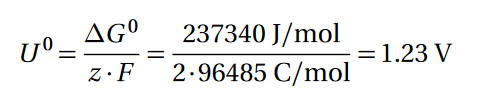

In [38]:
# Load fuel cell IV data
# Load data tsv
df_iv_fuelcell = pd.read_table('./data/t5/iv_fuel_cell.tsv')
df_iv_fuelcell # Columns: resistance	i_fc	u_fc	power_fc	efficiency_fc_electrical	VH2usagemeasured	vh2_theoretical_cons	vh2_cons_corrected	time	efficiency_fc_voltaic	text
# Add text column which is str(resistance) + " Ω"
df_iv_fuelcell['text'] = df_iv_fuelcell['resistance'].astype(str) + ' Ω'
# Change text to N/A where resistance = Open
df_iv_fuelcell.loc[df_iv_fuelcell['resistance'] == 'Open', 'text'] = f'Voc: {df_iv_fuelcell["u_fc"].max()}V' 
df_iv_fuelcell.loc[df_iv_fuelcell['resistance'] == 'Short circuit', 'text'] = f'Vsc: {df_iv_fuelcell["u_fc"].min()}V'
df_iv_fuelcell

,resistance,i_fc,u_fc,power_fc,efficiency_fc_electrical,VH2usagemeasured,vh2_theoretical_cons,vh2_cons_corrected,time,efficiency_fc_voltaic,text
0,Open,0.000,0.97,0.00000,0.000000,0.00,0.000000,0.01,30,0.654521,Voc: 0.97V
1,200,0.030,0.91,0.02730,6.884273,0.00,0.112130,0.01,30,0.614035,200 Ω
2,100,0.080,0.89,0.07120,0.359092,0.50,0.299014,0.50,30,0.600540,100 Ω
3,50,0.160,0.86,0.13760,0.693975,0.50,0.598029,0.50,30,0.580297,50 Ω
4,10,0.068,0.79,0.05372,0.541865,0.25,0.254162,0.25,30,0.533063,10 Ω
5,5,0.113,0.75,0.08475,0.284953,0.75,0.422358,0.75,30,0.506073,5 Ω
6,3,0.186,0.70,0.13020,0.218885,1.50,0.695208,1.50,30,0.472335,3 Ω
7,1,0.321,0.63,0.20223,0.169989,3.00,1.199795,3.00,30,0.425101,1 Ω
8,Short circuit,0.792,0.41,0.32472,0.272950,3.00,2.960242,3.00,30,0.276653,Vsc: 0.41V


In [39]:
# Plot fuel cell IV, IP curve and I-η curve in one plot
# Create a figure with sublots and two y-axis

# Create figure with secondary y-axis
fig = sp.make_subplots(specs=[[{"secondary_y": True}]])

# Size 800x800, background color white, no grid, black border, Title font size 30, axis font size 20, legend font size 18
fig.update_layout(width=800, height=800, 
                  title_font_size=30, 
                  font_size=20, 
                  legend_font_size=18)

# Add IV curve Primary y axis
fig.add_trace(go.Scatter(x=df_iv_fuelcell['i_fc'], y=df_iv_fuelcell['u_fc'], mode='lines+markers+text',
                        line=dict(width=3),
                        marker=dict(size=13, line=dict(width=2, color='black')),
                        text=df_iv_fuelcell['text'],
                        textposition="top right", 
                        name='Voltage'), secondary_y=False)
# Add PV curve Primary y axis
fig.add_trace(go.Scatter(x=df_iv_fuelcell['i_fc'], y=df_iv_fuelcell['power_fc'], mode='markers',
                        line=dict(width=4),
                        marker=dict(size=11, line=dict(width=2, color='black'), symbol='cross'),
                        name='Power'), secondary_y=False)
# Add I-η voltaic curve Secondary y axis
# fig.add_trace(go.Scatter(x=df_iv_fuelcell['i_fc'], y=df_iv_fuelcell['efficiency_fc_voltaic'], mode='markers',
#                         line=dict(width=3, dash='dash'),
#                         marker=dict(size=11, line=dict(width=2, color='black'), symbol='diamond'),
#                         name='η voltaic'), secondary_y=True)
# Add electric efficiency curve Secondary y axis
fig.add_trace(go.Scatter(x=df_iv_fuelcell['i_fc'], y=df_iv_fuelcell['efficiency_fc_electrical'], mode='markers',
                        line=dict(width=3, dash='dash'),
                        marker=dict(size=11, line=dict(width=2, color='black'), symbol='square'),
                        name='η electrical'), secondary_y=True)

# Add secondary axis label
fig.update_yaxes(title_text="Efficiency", secondary_y=True)


# Expand x-axis to make room for text
# Minimal voltage
min_u = df_iv_fuelcell['i_fc'].min()
# Maximal voltage
max_u = df_iv_fuelcell['i_fc'].max()
# Get 10% of the range
delta = (max_u - min_u) * 0.1
# Add to max
max_u += 3*delta
min_u -= delta

# Update second y axis range
fig.update_yaxes(range=[-0.1, 1.1], secondary_y=True)
# Update the x axis range
fig.update_xaxes(range=[min_u, max_u])

# Move legend to the top right
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.93,
    bgcolor='rgba(255, 255, 255, 0.9)'
))
# Add axis labels
fig.update_xaxes(title_text='Current [A]')
fig.update_yaxes(title_text='Voltage & Power [V, W]', secondary_y=False)
# Remove gridlines
fig.update_xaxes(showgrid=True, zeroline=False)
fig.update_yaxes(showgrid=True, zeroline=False)
# Add border
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
# Add title
fig.update_layout(title_text='Fuel Cell I-V, I-P, I-η Curve', title_x=0.5)
# Show the figure
fig.show()

In [40]:
# Plot IV curve of electrolyzer and fuel cell
fig = go.Figure()

# Size 800x800, background color white, no grid, black border, Title font size 30, axis font size 20, legend font size 18
fig.update_layout(width=800, height=800, 
                  title_font_size=30, 
                  font_size=20, 
                  legend_font_size=18)

# plot electrolyzer current vs voltage
fig.add_trace(go.Scatter(x=df_iv_electrolyser['voltage_electrolyser'], y=df_iv_electrolyser['current_electrolyser'], mode='lines+markers',
                        line=dict(width=4),
                        marker=dict(size=12, line=dict(width=2, color='black')), 
                        name='Electrolyzer'))

# plot fuel cell current vs voltage
fig.add_trace(go.Scatter(x=df_iv_fuelcell['u_fc'], y=df_iv_fuelcell['i_fc'], mode='lines+markers',
                        line=dict(width=4),
                        marker=dict(size=12, line=dict(width=2, color='black')), 
                        name='Fuel Cell'))

# Add axis labels
fig.update_xaxes(title_text='Voltage [V]')
fig.update_yaxes(title_text='Current [A]')
# Remove gridlines
fig.update_xaxes(showgrid=True, zeroline=False)
fig.update_yaxes(showgrid=True, zeroline=False)
# Add border
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
# Add title
fig.update_layout(title_text='Electrolyzer and Fuel Cell IV Curve', title_x=0.5)
# Show the figure
fig.show()




In [41]:
# Plot polarization curves of electrolyzer and fuel cell (current is x, voltage is y)
fig = go.Figure()

# Size 800x800, background color white, no grid, black border, Title font size 30, axis font size 20, legend font size 18
fig.update_layout(width=800, height=800, 
                  title_font_size=30, 
                  font_size=20, 
                  legend_font_size=18)

# plot electrolyzer current vs voltage

fig.add_trace(go.Scatter(x=df_iv_electrolyser['current_electrolyser'], y=df_iv_electrolyser['voltage_electrolyser'], mode='lines+markers',
                        line=dict(width=4),
                        marker=dict(size=12, line=dict(width=2, color='black')), 
                        name='Electrolyzer'))

# plot fuel cell current vs voltage
fig.add_trace(go.Scatter(x=df_iv_fuelcell['i_fc'], y=df_iv_fuelcell['u_fc'], mode='lines+markers',
                        line=dict(width=4),
                        marker=dict(size=12, line=dict(width=2, color='black')), 
                        name='Fuel Cell'))  

# Add axis labels
fig.update_xaxes(title_text='Current [A]')
fig.update_yaxes(title_text='Voltage [V]')
# Remove gridlines
fig.update_xaxes(showgrid=True, zeroline=False)
fig.update_yaxes(showgrid=True, zeroline=False)
# Add border
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
# Add title
fig.update_layout(title_text='Electrolyzer and Fuel Cell Polarization Curve', title_x=0.5)
# Show the figure
fig.show()


# TASK 6

In [42]:
df_pviv_t6 = pd.read_table('./data/t6/pviv.tsv') # Columns: 	resistance	current	voltage	power
df_pviv_t6['text'] = df_pviv_t6['resistance'].astype(str) + ' Ω'
df_pviv_t6.loc[df_pviv_t6['resistance'] == 'Open', 'text'] = f'Voc: {df_pviv_t6["voltage"].max()}V'
df_pviv_t6.loc[df_pviv_t6['resistance'] == 'Short circuit', 'text'] = f'Vsc: {df_pviv_t6["voltage"].min()}V'
df_pviv_t6 

,resistance,current,voltage,power,text
0,Open,0.000,2.52,0.00000,Voc: 2.52V
1,200,0.110,2.46,0.27060,200 Ω
2,100,0.210,2.40,0.50400,100 Ω
3,50,0.430,2.25,0.96750,50 Ω
4,10,0.126,1.63,0.20538,10 Ω
5,5,0.157,1.15,0.18055,5 Ω
6,3,0.181,0.78,0.14118,3 Ω
7,1,0.188,0.37,0.06956,1 Ω
8,Short circuit,0.310,0.06,0.01860,Vsc: 0.06V


In [43]:
# Plot IV of electrolyzer from Task 5 and PV module from Task 6


# Plot IV curve
fig = go.Figure()

# Size 800x800, background color white, no grid, black border, Title font size 30, axis font size 20, legend font size 18
fig.update_layout(width=800, height=800, 
                  title_font_size=30, 
                  font_size=20, 
                  legend_font_size=18)

fig.add_trace(go.Scatter(x=df_iv_electrolyser['voltage_electrolyser'], y=df_iv_electrolyser['current_electrolyser'], mode='lines+markers',
                        line=dict(width=4),
                        marker=dict(size=12, line=dict(width=2, color='black')), 
                        name='Electrolyser'))

fig.add_trace(go.Scatter(x=df_pviv_t6['voltage'], y=df_pviv_t6['current'], mode='lines+markers+text', name='PV Module',
                        line=dict(width=3),
                        marker=dict(size=12, line=dict(width=2, color='black')),
                        text = df_pviv_t6['text'],
                        textposition="top center"
                         ))

# Get min and max voltage of pv df
min_u = df_pviv_t6['voltage'].min()
max_u = df_pviv_t6['voltage'].max()
# Get 10% of the range
delta = (max_u - min_u) * 0.1
# Update range of x axis
fig.update_xaxes(range=[min_u - 1.5*delta, max_u + 1.5*delta])

# Add axis labels
fig.update_xaxes(title_text='Voltage [V]')
fig.update_yaxes(title_text='Current [A]')
# Remove gridlines
fig.update_xaxes(showgrid=True, zeroline=False)
fig.update_yaxes(showgrid=True, zeroline=False)
# Add border
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
# Add title
fig.update_layout(title_text='Electrolyser and PV module IV Curve', title_x=0.5)
# Show the figure
fig.show()